<a href="https://colab.research.google.com/github/antipovaya/probability-theory-and-mathematical-statistics/blob/main/%D0%94%D0%B8%D1%81%D0%BF%D0%B5%D1%80%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9__%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Однофакторный дисперсионный анализ**

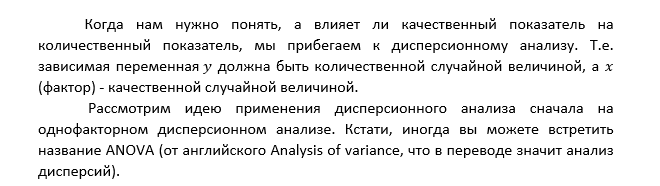

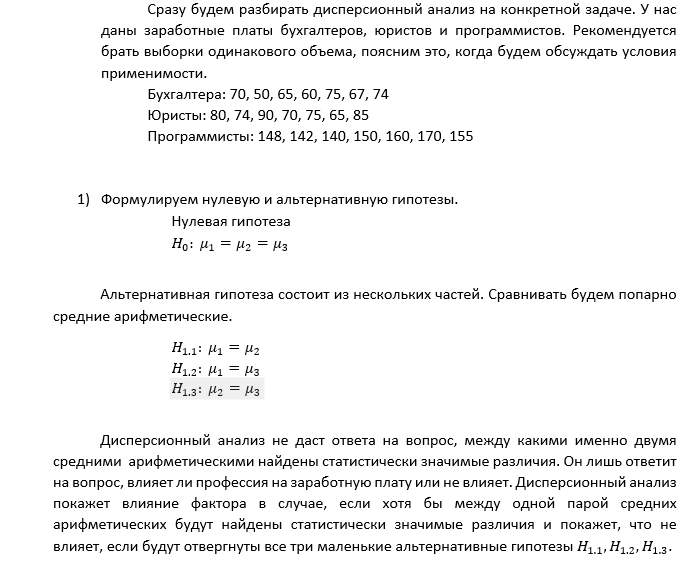

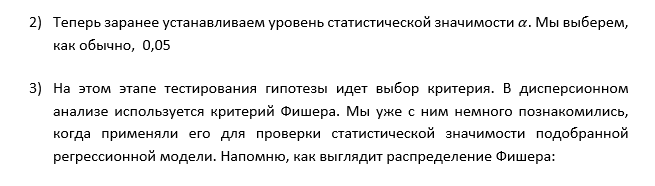

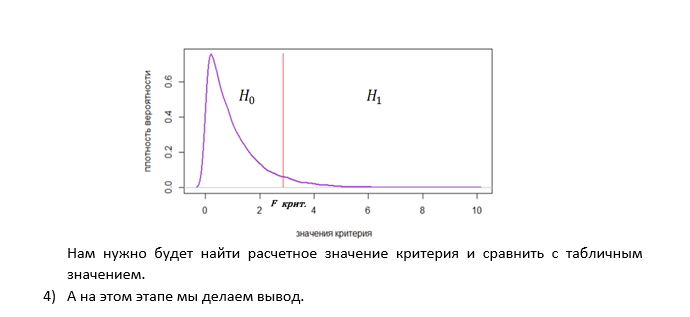

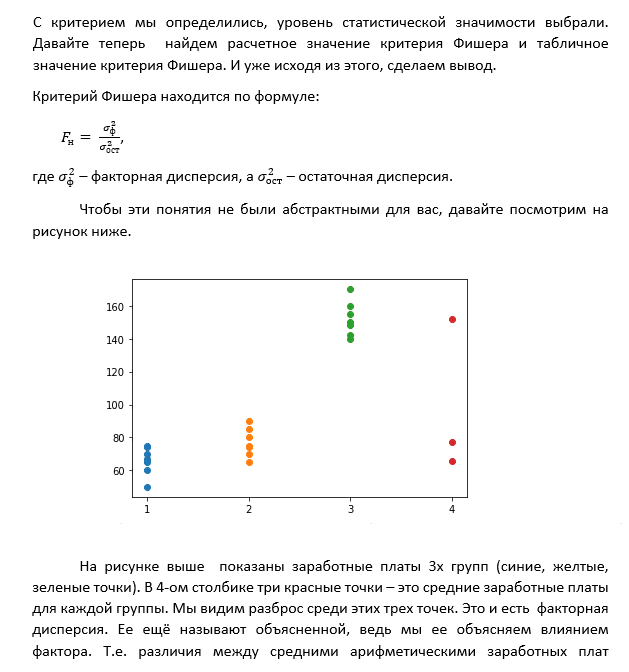

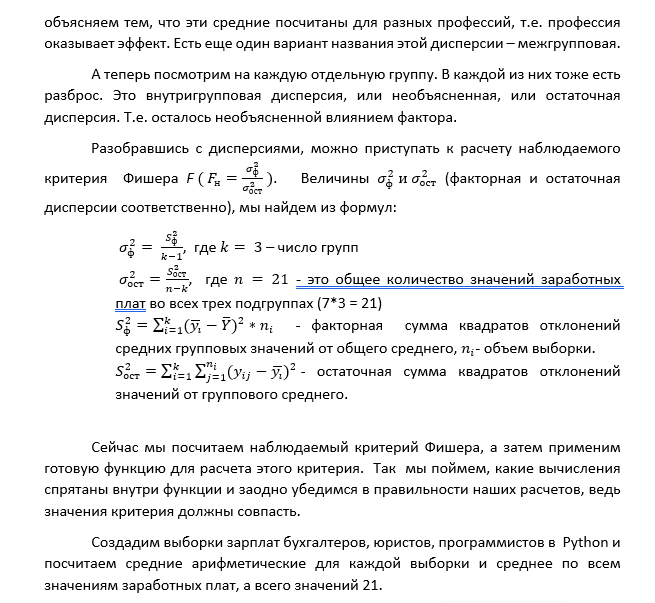

Количество групп (профессий): 3
Общее количество наблюдений: 21

Средняя зарплата юристов: 65.86
Средняя зарплата программистов: 77.00
Средняя зарплата бухгалтеров: 152.14
Общее среднее значение зарплат: 98.33

Общая сумма квадратов отклонений (SST): 32400.6667
Сумма квадратов между группами (SSB): 30836.9524
Остаточная сумма квадратов (SSW): 1563.7143
Проверка: SSB + SSW = 32400.6667 (должно равняться SST = 32400.6667)

Межгрупповая дисперсия (MSB): 15418.4762
Внутригрупповая дисперсия (MSW): 86.8730
F-статистика: 177.4829

Проверка с помощью scipy.stats.f_oneway:
F-статистика: 177.4829
p-value: 1.4205e-12


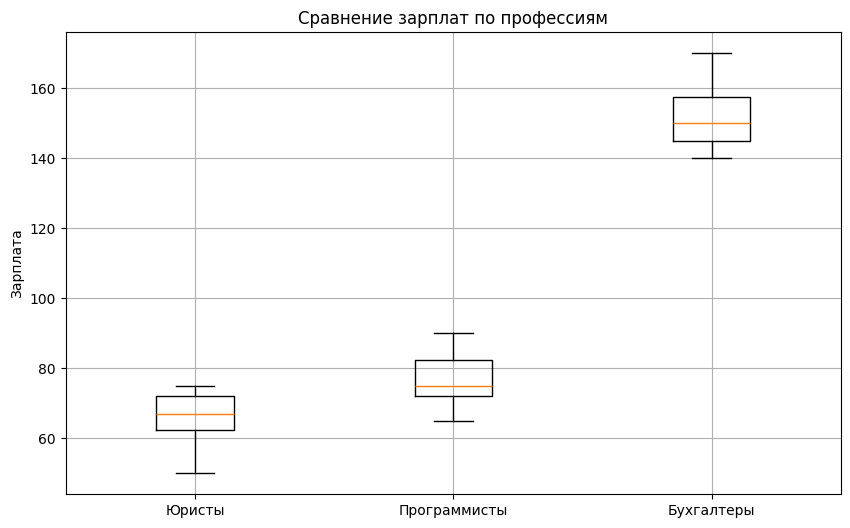


Уровень значимости: α = 0.05
Отвергаем нулевую гипотезу: существуют статистически значимые различия в зарплатах между профессиями.

Попарные сравнения (t-тест с поправкой Бонферрони):
Юристы vs Программисты: p-value = 3.3316e-02, значимо? Нет
Юристы vs Бухгалтеры: p-value = 1.1003e-09, значимо? Да
Программисты vs Бухгалтеры: p-value = 5.1926e-09, значимо? Да


In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Данные о зарплатах представителей трех профессий
y1 = np.array([70, 50, 65, 60, 75, 67, 74])  # зарплаты юристов
y2 = np.array([80, 74, 90, 70, 75, 65, 85])  # зарплаты программистов
y3 = np.array([148, 142, 140, 150, 160, 170, 155])  # зарплаты бухгалтеров

# Шаг 1: Основные параметры
k = 3  # количество групп (профессий)
n = len(y1) + len(y2) + len(y3)  # общее количество наблюдений
print(f"Количество групп (профессий): {k}")
print(f"Общее количество наблюдений: {n}")

# Шаг 2: Расчет средних значений
y_mean_1 = np.mean(y1)
y_mean_2 = np.mean(y2)
y_mean_3 = np.mean(y3)

print(f"\nСредняя зарплата юристов: {y_mean_1:.2f}")
print(f"Средняя зарплата программистов: {y_mean_2:.2f}")
print(f"Средняя зарплата бухгалтеров: {y_mean_3:.2f}")

# Общее среднее значение
total = np.concatenate([y1, y2, y3])
y_mean_total = np.mean(total)
print(f"Общее среднее значение зарплат: {y_mean_total:.2f}")

# Шаг 3: Расчет сумм квадратов отклонений
# Общая сумма квадратов (SST) - отклонения всех наблюдений от общего среднего
SST = np.sum((total - y_mean_total)**2)
print(f"\nОбщая сумма квадратов отклонений (SST): {SST:.4f}")

# Сумма квадратов между группами (SSB) - отклонения групповых средних от общего среднего
SSB = np.sum((y_mean_1 - y_mean_total)**2) * len(y1) + \
      np.sum((y_mean_2 - y_mean_total)**2) * len(y2) + \
      np.sum((y_mean_3 - y_mean_total)**2) * len(y3)
print(f"Сумма квадратов между группами (SSB): {SSB:.4f}")

# Остаточная сумма квадратов (SSW) - отклонения внутри групп
SSW = np.sum((y1 - y_mean_1)**2) + np.sum((y2 - y_mean_2)**2) + np.sum((y3 - y_mean_3)**2)
print(f"Остаточная сумма квадратов (SSW): {SSW:.4f}")

# Проверка: SST = SSB + SSW
print(f"Проверка: SSB + SSW = {SSB + SSW:.4f} (должно равняться SST = {SST:.4f})")

# Шаг 4: Расчет дисперсий
# Межгрупповая дисперсия (MSB)
MSB = SSB / (k - 1)
print(f"\nМежгрупповая дисперсия (MSB): {MSB:.4f}")

# Внутригрупповая дисперсия (MSW)
MSW = SSW / (n - k)
print(f"Внутригрупповая дисперсия (MSW): {MSW:.4f}")

# Шаг 5: Расчет F-статистики
F_n = MSB / MSW
print(f"F-статистика: {F_n:.4f}")

# Шаг 6: Проверка с использованием встроенной функции
f_stat, p_value = stats.f_oneway(y1, y2, y3)
print(f"\nПроверка с помощью scipy.stats.f_oneway:")
print(f"F-статистика: {f_stat:.4f}")
print(f"p-value: {p_value:.4e}")

# Шаг 7: Визуализация данных
plt.figure(figsize=(10, 6))
plt.boxplot([y1, y2, y3], tick_labels=['Юристы', 'Программисты', 'Бухгалтеры'])
plt.ylabel('Зарплата')
plt.title('Сравнение зарплат по профессиям')
plt.grid(True)
plt.show()

# Шаг 8: Определение статистической значимости
alpha = 0.05
print(f"\nУровень значимости: α = {alpha}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существуют статистически значимые различия в зарплатах между профессиями.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимых различий в зарплатах между профессиями.")

# Шаг 9: Пост-хок анализ (попарные сравнения)
print("\nПопарные сравнения (t-тест с поправкой Бонферрони):")
professions = ['Юристы', 'Программисты', 'Бухгалтеры']
groups = [y1, y2, y3]

# Поправка Бонферрони для множественных сравнений
bonferroni_alpha = alpha / 3  # 3 попарных сравнения

for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        t_stat, p_val = stats.ttest_ind(groups[i], groups[j])
        significant = "Да" if p_val < bonferroni_alpha else "Нет"
        print(f"{professions[i]} vs {professions[j]}: p-value = {p_val:.4e}, значимо? {significant}")